In [4]:
import pandas as pd
import numpy as np 

In [5]:
df = pd.read_csv('CO2 Emissions_Canada.csv')


In [6]:
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [7]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.head()

,make,model,vehicle_class,engine_size(l),cylinders,transmission,fuel_type,fuel_consumption_city_(l/100_km),fuel_consumption_hwy_(l/100_km),fuel_consumption_comb_(l/100_km),fuel_consumption_comb_(mpg),co2_emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [8]:
cat = list(df.dtypes[df.dtypes == 'object'].index)

for c in cat:
    df[c] = df[c].str.lower().str.replace(' ', '_')



In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df.nunique()

make                                  42
model                               1596
vehicle_class                         16
engine_size(l)                        51
cylinders                              8
transmission                          27
fuel_type                              5
fuel_consumption_city_(l/100_km)     211
fuel_consumption_hwy_(l/100_km)      143
fuel_consumption_comb_(l/100_km)     181
fuel_consumption_comb_(mpg)           54
co2_emissions(g/km)                  331
dtype: int64

In [11]:
df.dtypes

make                                 object
model                                object
vehicle_class                        object
engine_size(l)                      float64
cylinders                             int64
transmission                         object
fuel_type                            object
fuel_consumption_city_(l/100_km)    float64
fuel_consumption_hwy_(l/100_km)     float64
fuel_consumption_comb_(l/100_km)    float64
fuel_consumption_comb_(mpg)           int64
co2_emissions(g/km)                   int64
dtype: object

In [12]:
df.fuel_type.value_counts()

x    3637
z    3202
e     370
d     175
n       1
Name: fuel_type, dtype: int64

In [13]:
df = df.rename(columns={'engine_size(l)': 'engine_size',
               'fuel_consumption_city_(l/100_km)': 'fuel_consumption_city',
                        'fuel_consumption_hwy_(l/100_km)': 'fuel_consumption_hwy',
                        'fuel_consumption_comb_(l/100_km)': 'fuel_consumption_comb',
                        'fuel_consumption_comb_(mpg)': 'fuel_consumption_comb_mpg',
                        'co2_emissions(g/km)': 'co2_emissions'})


In [14]:
df.head()

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb,fuel_consumption_comb_mpg,co2_emissions
0,acura,ilx,compact,2.0,4,as5,z,9.9,6.7,8.5,33,196
1,acura,ilx,compact,2.4,4,m6,z,11.2,7.7,9.6,29,221
2,acura,ilx_hybrid,compact,1.5,4,av7,z,6.0,5.8,5.9,48,136
3,acura,mdx_4wd,suv_-_small,3.5,6,as6,z,12.7,9.1,11.1,25,255
4,acura,rdx_awd,suv_-_small,3.5,6,as6,z,12.1,8.7,10.6,27,244


<AxesSubplot:xlabel='co2_emissions', ylabel='Count'>

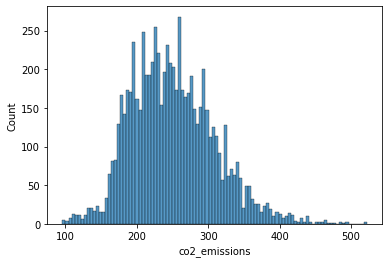

In [15]:
sns.histplot(df.co2_emissions, bins=100)

<AxesSubplot:xlabel='co2_emissions', ylabel='Count'>

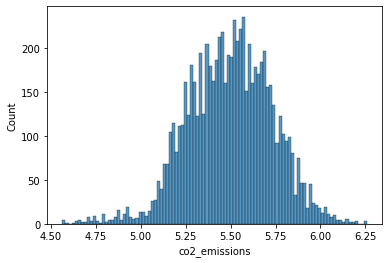

In [16]:
sns.histplot(np.log(df.co2_emissions), bins = 100)

In [17]:
df['log_co2'] = np.log(df.co2_emissions)
del df['co2_emissions']

# Setting Work asda

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
df_full_train, df_test = train_test_split(df, test_size = 0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)
len(df_train), len(df_test), len(df_val)

(4431, 1477, 1477)

In [20]:
df_full_train = df_full_train.reset_index(drop=True)
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

# 1.Exploratory Data Analysis

### 1.1 Checking NA

In [21]:
df.isna().sum()

make                         0
model                        0
vehicle_class                0
engine_size                  0
cylinders                    0
transmission                 0
fuel_type                    0
fuel_consumption_city        0
fuel_consumption_hwy         0
fuel_consumption_comb        0
fuel_consumption_comb_mpg    0
log_co2                      0
dtype: int64

In [22]:
df.head()

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb,fuel_consumption_comb_mpg,log_co2
0,acura,ilx,compact,2.0,4,as5,z,9.9,6.7,8.5,33,5.278115
1,acura,ilx,compact,2.4,4,m6,z,11.2,7.7,9.6,29,5.398163
2,acura,ilx_hybrid,compact,1.5,4,av7,z,6.0,5.8,5.9,48,4.912655
3,acura,mdx_4wd,suv_-_small,3.5,6,as6,z,12.7,9.1,11.1,25,5.541264
4,acura,rdx_awd,suv_-_small,3.5,6,as6,z,12.1,8.7,10.6,27,5.497168


In [23]:
df.nunique()

make                           42
model                        1596
vehicle_class                  16
engine_size                    51
cylinders                       8
transmission                   27
fuel_type                       5
fuel_consumption_city         211
fuel_consumption_hwy          143
fuel_consumption_comb         181
fuel_consumption_comb_mpg      54
log_co2                       331
dtype: int64

### 1.2 Exploratory Data Analysis For Categorical Variable

#### 1.2.1 Car Manufacturer

<AxesSubplot:xlabel='count', ylabel='make'>

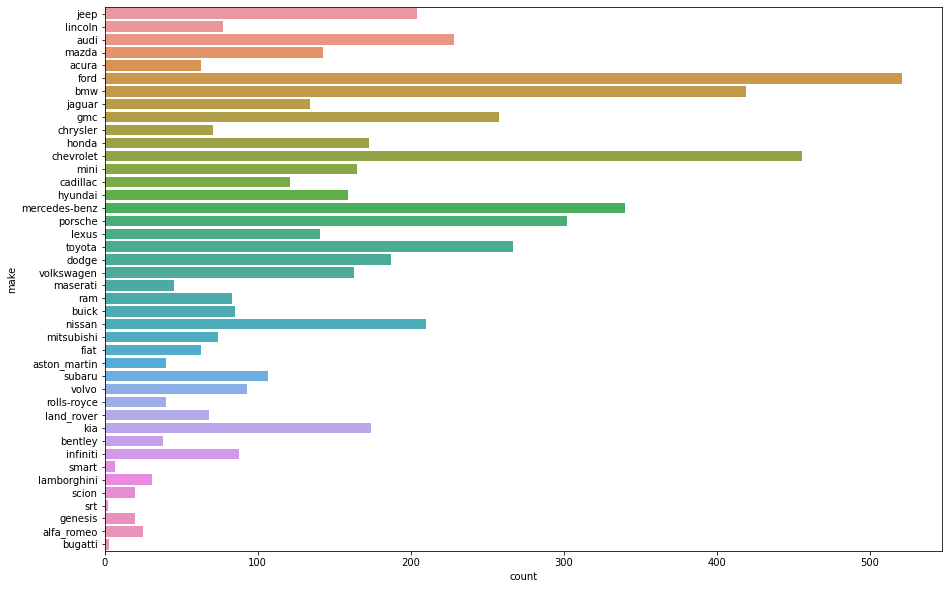

In [24]:
plt.figure(figsize=(15,10))
sns.countplot(y = "make", data=df_full_train, orient='v' )

#### 1.2.2 Transmission

Text(0.5, 0, 'Transmission')

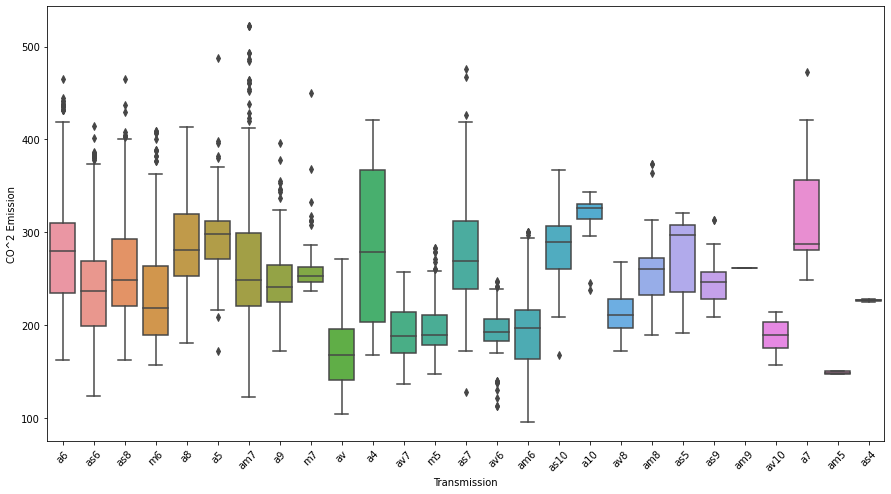

In [25]:
plt.figure(figsize=(15,8))
sns.boxplot(x = df_full_train.transmission, y = np.exp(df_full_train.log_co2), data = df_full_train)
plt.xticks(rotation=45)
plt.ylabel("CO^2 Emission")
plt.xlabel("Transmission")

#### 1.2.3 Vehicle Class

Text(0.5, 0, 'Vehicle Class')

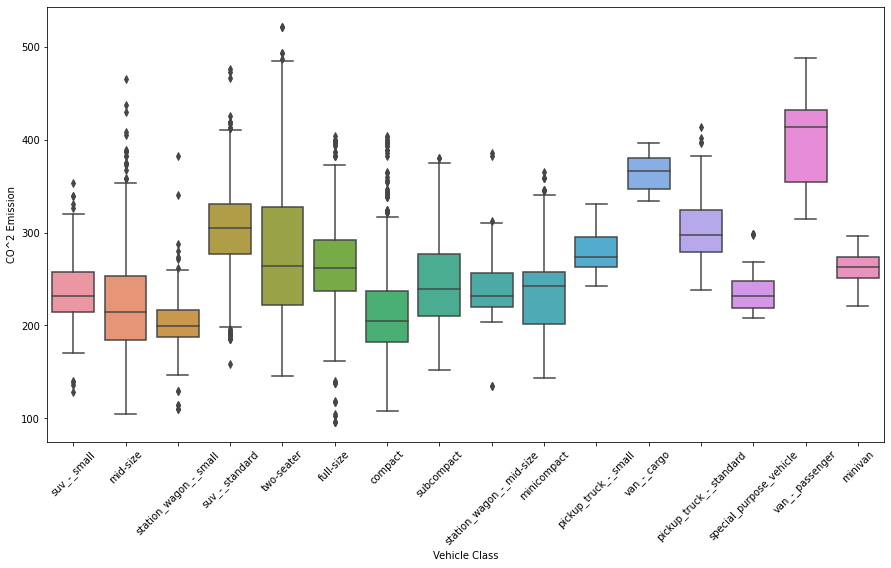

In [26]:
plt.figure(figsize=(15,8))
sns.boxplot(x = df_full_train.vehicle_class, y = np.exp(df_full_train.log_co2), data = df_full_train)
plt.xticks(rotation=45)
plt.ylabel("CO^2 Emission")
plt.xlabel("Vehicle Class")



#### 1.2.4 Fuel Type

Text(0.5, 0, 'Fuel Type')

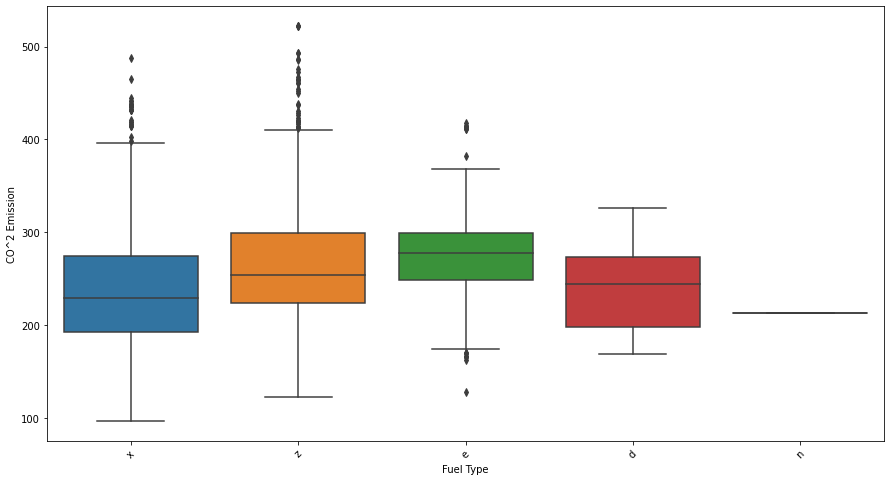

In [27]:

plt.figure(figsize=(15,8))
sns.boxplot(x = df_full_train.fuel_type, y = np.exp(df_full_train.log_co2), data = df_full_train)
plt.xticks(rotation=45)
plt.ylabel("CO^2 Emission")
plt.xlabel("Fuel Type")

### 1.3 Exploratory Data Analysis For Numerical Variable

#### 1.3.1 Engine Size

Text(0.5, 0, 'Engine Size')

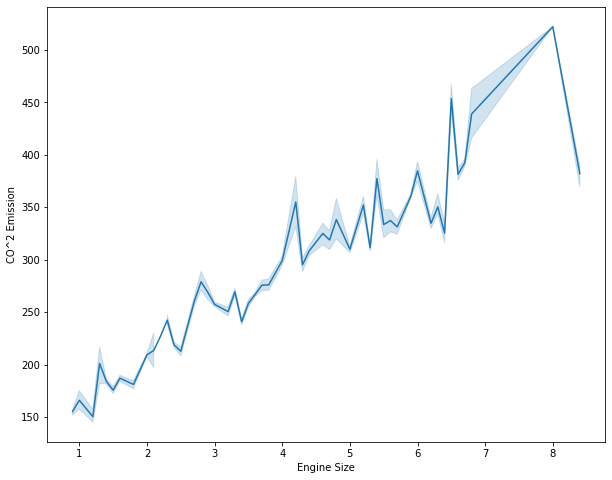

In [28]:
plt.figure(figsize=(10,8))
sns.lineplot(data=df_full_train, x = df_full_train.engine_size, y = np.exp(df_full_train.log_co2))
plt.ylabel("CO^2 Emission")
plt.xlabel("Engine Size")

In [29]:
df_full_train[
	df_full_train['engine_size'] == 8
]

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb,fuel_consumption_comb_mpg,log_co2
990,bugatti,chiron,two-seater,8.0,16,am7,z,26.8,16.6,22.2,13,6.257668
4932,bugatti,chiron,two-seater,8.0,16,am7,z,26.8,16.6,22.2,13,6.257668
5680,bugatti,chiron,two-seater,8.0,16,am7,z,26.8,16.6,22.2,13,6.257668


#### 1.3.2 Cylinders

Text(0.5, 0, 'Cylinders')

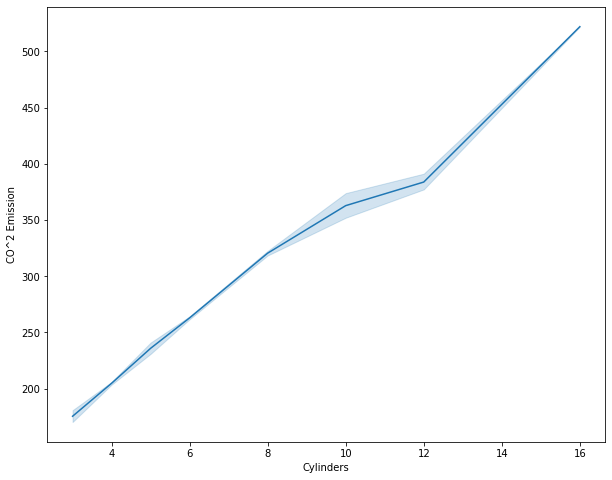

In [30]:
plt.figure(figsize=(10,8))
sns.lineplot(data=df_full_train, x = df_full_train.cylinders, y = np.exp(df_full_train.log_co2))
plt.ylabel("CO^2 Emission")
plt.xlabel("Cylinders")

In [31]:
df_full_train[
	df_full_train['cylinders'] == 16
]

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb,fuel_consumption_comb_mpg,log_co2
990,bugatti,chiron,two-seater,8.0,16,am7,z,26.8,16.6,22.2,13,6.257668
4932,bugatti,chiron,two-seater,8.0,16,am7,z,26.8,16.6,22.2,13,6.257668
5680,bugatti,chiron,two-seater,8.0,16,am7,z,26.8,16.6,22.2,13,6.257668


#### 1.3.3 Transmission

Text(0.5, 0, 'Transmission')

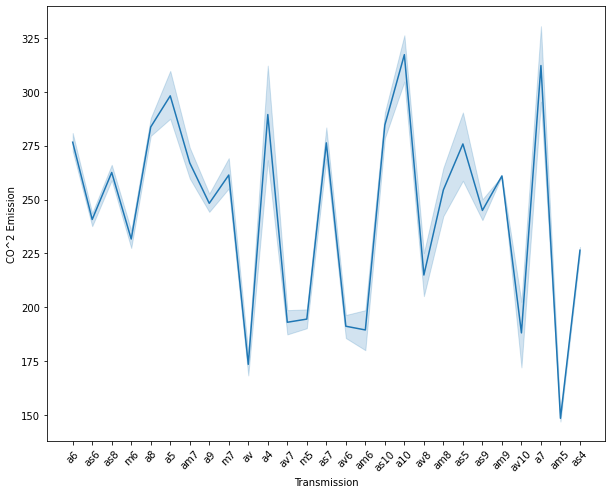

In [32]:
plt.figure(figsize=(10,8))
sns.lineplot(data=df_full_train, x = df_full_train.transmission, y = np.exp(df_full_train.log_co2))
plt.xticks(rotation=45)
plt.ylabel("CO^2 Emission")
plt.xlabel("Transmission")

#### 1.3.4 Fuel Consumpiton for City

Text(0.5, 0, 'fuel_consumption_city (l/100_km)')

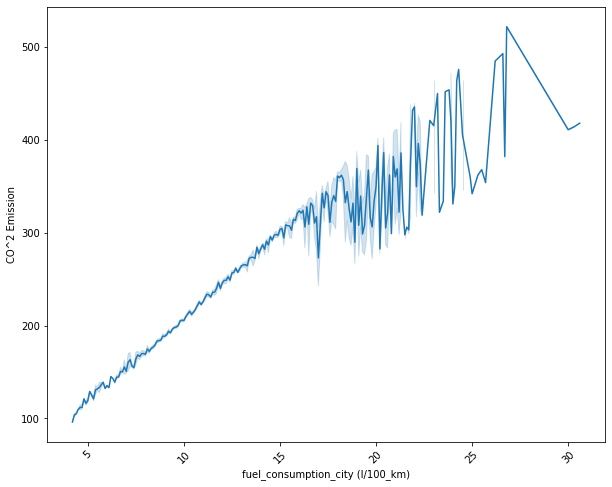

In [33]:
plt.figure(figsize=(10,8))
sns.lineplot(data=df_full_train, x = df_full_train.fuel_consumption_city, y = np.exp(df_full_train.log_co2))
plt.xticks(rotation=45)
plt.ylabel("CO^2 Emission")
plt.xlabel("fuel_consumption_city (l/100_km)")

In [34]:
df_cylinders = df_full_train[
	df_full_train['fuel_consumption_city'] <= 17
]

In [35]:
df_cylinders2 = df_full_train[
	df_full_train['fuel_consumption_city'] > 17
]

<AxesSubplot:xlabel='count', ylabel='fuel_type'>

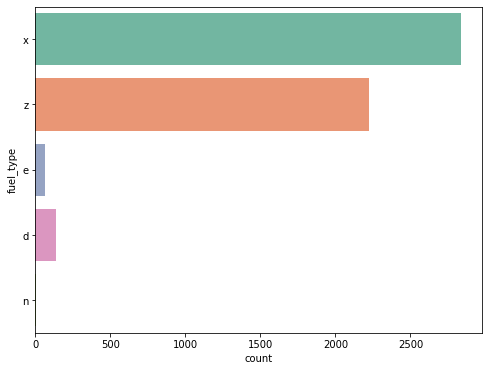

In [36]:
plt.figure(figsize=(8,6))
sns.countplot(y = "fuel_type", data=df_cylinders, palette="Set2")

<AxesSubplot:xlabel='count', ylabel='fuel_type'>

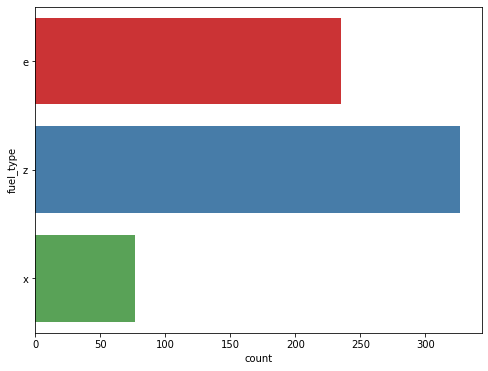

In [37]:
plt.figure(figsize=(8,6))
sns.countplot(y = "fuel_type", data=df_cylinders2, palette="Set1")

#### 1.3.5 Fuel Consumption Highway

Text(0.5, 0, 'fuel_consumption_hwy (l/100_km)')

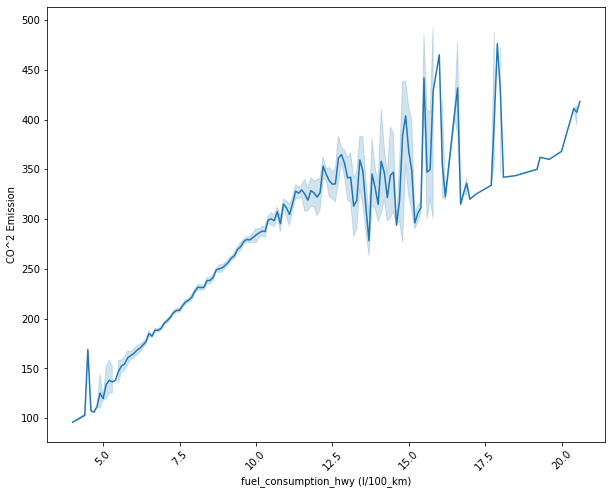

In [38]:
plt.figure(figsize=(10,8))
sns.lineplot(data=df_full_train, x = df_full_train.fuel_consumption_hwy, y = np.exp(df_full_train.log_co2))
plt.xticks(rotation=45)
plt.ylabel("CO^2 Emission")
plt.xlabel("fuel_consumption_hwy (l/100_km)")

#### 1.3.6 Fuel Consumpiton Combined (55% city & 45% highway)

Text(0.5, 0, 'fuel_consumption_comb (l/100_km)')

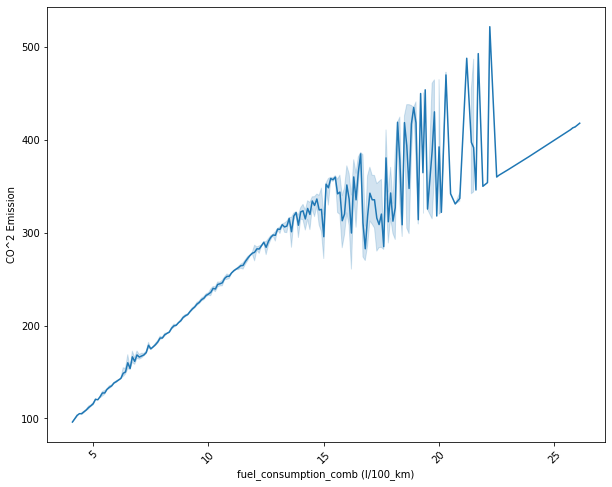

In [39]:
plt.figure(figsize=(10,8))
sns.lineplot(data=df_full_train, x = df_full_train.fuel_consumption_comb, y = np.exp(df_full_train.log_co2))
plt.xticks(rotation=45)
plt.ylabel("CO^2 Emission")
plt.xlabel("fuel_consumption_comb (l/100_km)")

#### 1.3.7 Fuel Consumption Combined Miles Per Gallon

Text(0.5, 0, 'fuel_consumption_comb (mpg)')

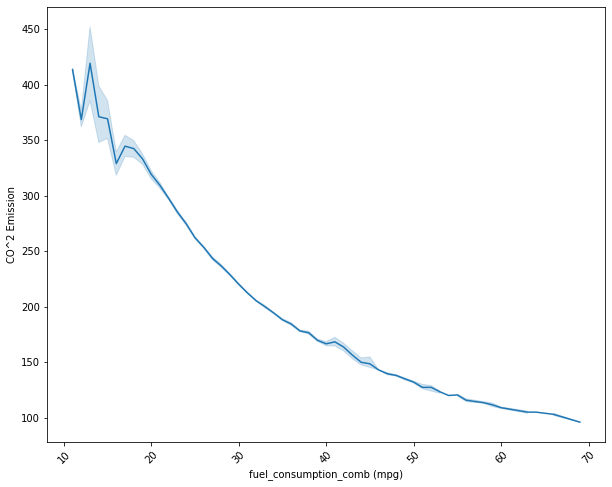

In [40]:
plt.figure(figsize=(10,8))
sns.lineplot(data=df_full_train, x = df_full_train.fuel_consumption_comb_mpg, y = np.exp(df_full_train.log_co2))
plt.xticks(rotation=45)
plt.ylabel("CO^2 Emission")
plt.xlabel("fuel_consumption_comb (mpg)")

### 1.4 Exploratory Data Analysis For Correlated Data

In [41]:

num = ['engine_size', 'cylinders', 'fuel_consumption_city', 'fuel_consumption_hwy', 'fuel_consumption_comb', 'fuel_consumption_comb_mpg']

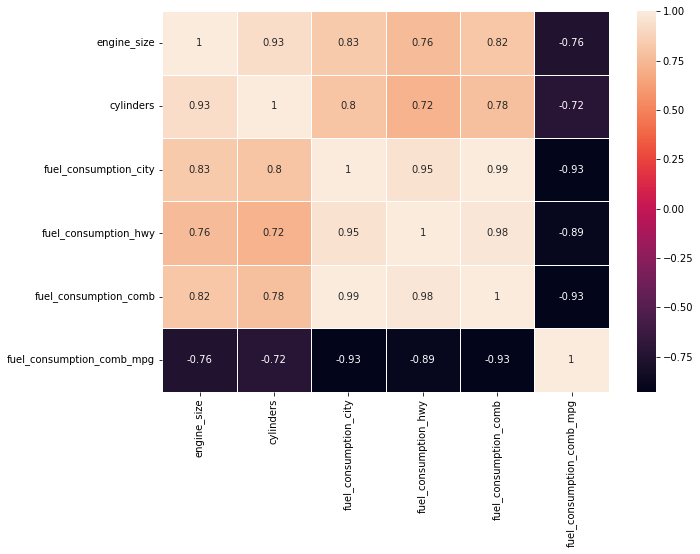

In [42]:

plt.figure(figsize=(10,7))  
sns.heatmap(df[num].corr(),annot=True,linewidths=.5)
plt.show()

### 1.4 Models

#### 1.4.1 Linear Regression

In [43]:
selected=['vehicle_class', 'engine_size', 'cylinders', 'fuel_type', 'fuel_consumption_city', 'fuel_consumption_hwy', 'fuel_consumption_comb_mpg', 'log_co2']

In [44]:
df_train = df_train[selected]
df_val = df_val[selected]
df_test = df_test[selected]

In [45]:
df_train.nunique()

vehicle_class                 16
engine_size                   50
cylinders                      8
fuel_type                      4
fuel_consumption_city        204
fuel_consumption_hwy         135
fuel_consumption_comb_mpg     53
log_co2                      314
dtype: int64

In [46]:
df_val.nunique()

vehicle_class                 16
engine_size                   49
cylinders                      8
fuel_type                      5
fuel_consumption_city        174
fuel_consumption_hwy         114
fuel_consumption_comb_mpg     43
log_co2                      259
dtype: int64

In [47]:
df_val.fuel_type.value_counts()

x    729
z    640
e     74
d     33
n      1
Name: fuel_type, dtype: int64

In [48]:
df_val.drop(df_val[
	df_val.fuel_type == 'n'
].index, inplace = True)

In [49]:
df_train[
	df_train.cylinders == 16
]

,vehicle_class,engine_size,cylinders,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb_mpg,log_co2
684,two-seater,8.0,16,z,26.8,16.6,13,6.257668
1802,two-seater,8.0,16,z,26.8,16.6,13,6.257668


In [50]:
df_train.drop(df_train[
	df_train.cylinders == 16
].index, inplace = True)

In [51]:
df_val.drop(df_val[
	df_val.cylinders == 16
].index, inplace = True)


In [52]:
df_train.cylinders.value_counts()

4     1923
6     1485
8      843
12      78
3       61
10      24
5       15
Name: cylinders, dtype: int64

In [53]:
df_val.cylinders.value_counts()

4     648
6     494
8     258
12     44
3      14
10     10
5       7
Name: cylinders, dtype: int64

In [54]:
from sklearn.feature_extraction import DictVectorizer


In [55]:
y_train = df_train['log_co2'].values
y_val = df_val['log_co2'].values
y_test = df_test['log_co2'].values

In [56]:
del df_train['log_co2']
del df_val['log_co2']
del df_test['log_co2']

In [57]:
train_dicts = df_train.to_dict(orient = 'records')
dv = DictVectorizer(sparse = False)
X_train = dv.fit_transform(train_dicts)

In [58]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [59]:
X_train.shape

(4429, 25)

In [60]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [61]:
linear_model.score(X_train, y_train)

0.995615489766251

In [62]:
y_pred_train = linear_model.predict(X_train)


In [63]:
r2_score(y_pred_train, y_train), mean_squared_error(y_pred_train, y_train, squared=False)

(0.9955961811775564, 0.015527409345550393)

In [64]:
val_dicts = df_val.to_dict(orient = 'records')
dv = DictVectorizer(sparse = False)
X_val = dv.fit_transform(val_dicts)

In [65]:
X_val.shape

(1475, 25)

In [66]:
y_pred_val = linear_model.predict(X_val)

In [67]:
r2_score(y_pred_val, y_val), mean_squared_error(y_pred_val, y_val, squared=False)

(0.9966151928674323, 0.013520166661567024)

### 1.4.1 Decision Tree

In [68]:
from sklearn.tree import DecisionTreeRegressor

In [69]:
dt = DecisionTreeRegressor()

In [70]:
dt.fit(X_train, y_train)

DecisionTreeRegressor()

In [71]:
y_pred_train = dt.predict(X_train)
r2_score(y_pred_train, y_train), mean_squared_error(y_pred_train, y_train, squared=False)

(0.9997043662315936, 0.004031357299439389)

In [72]:
y_pred_val = dt.predict(X_val)
r2_score(y_pred_val, y_val), mean_squared_error(y_pred_val, y_val, squared=False)

(0.9967058854612876, 0.013400710534921517)

In [73]:
for d in [1,2,3,4,5,6,10,15,20, None]:
	dt = DecisionTreeRegressor(max_depth=d)
	dt.fit(X_train, y_train)
	y_pred_val = dt.predict(X_val)
	r2 = r2_score(y_pred_val, y_val)
	rmse = mean_squared_error(y_pred_val, y_val, squared=False)
	print('%4s -> %4s -> %.3f' % (d, r2, rmse))



   1 -> 0.37489856678558486 -> 0.144
   2 -> 0.8043129801099816 -> 0.095
   3 -> 0.9013856760601923 -> 0.071
   4 -> 0.9527902381118545 -> 0.050
   5 -> 0.978988446500782 -> 0.034
   6 -> 0.9902580484248293 -> 0.023
  10 -> 0.9965839297098295 -> 0.014
  15 -> 0.9968283779903852 -> 0.013
  20 -> 0.9967501272454854 -> 0.013
None -> 0.9966123249213101 -> 0.014


In [74]:
scores= []
for d in [3,4,5,6,10,15,20,25,30]:
	for s in [1,2,5,10,20,50,100,150,200, 500]:
		dt = DecisionTreeRegressor(max_depth=d, min_samples_leaf=s)
		dt.fit(X_train, y_train)
		y_pred_val = dt.predict(X_val)
		r2=r2_score(y_pred_val, y_val)
		rmse = mean_squared_error(y_pred_val, y_val , squared=False)
		print(('%4s, %3d) -> %.3f -> %.3f' % (d,s, r2, rmse )))
		scores.append((s,d, r2, rmse))



   3,   1) -> 0.901 -> 0.071
   3,   2) -> 0.901 -> 0.071
   3,   5) -> 0.901 -> 0.071
   3,  10) -> 0.901 -> 0.071
   3,  20) -> 0.901 -> 0.071
   3,  50) -> 0.901 -> 0.071
   3, 100) -> 0.903 -> 0.071
   3, 150) -> 0.899 -> 0.072
   3, 200) -> 0.897 -> 0.072
   3, 500) -> 0.861 -> 0.082
   4,   1) -> 0.953 -> 0.050
   4,   2) -> 0.953 -> 0.050
   4,   5) -> 0.953 -> 0.050
   4,  10) -> 0.952 -> 0.051
   4,  20) -> 0.946 -> 0.054
   4,  50) -> 0.944 -> 0.055
   4, 100) -> 0.943 -> 0.056
   4, 150) -> 0.939 -> 0.057
   4, 200) -> 0.916 -> 0.065
   4, 500) -> 0.861 -> 0.082
   5,   1) -> 0.979 -> 0.034
   5,   2) -> 0.979 -> 0.034
   5,   5) -> 0.979 -> 0.034
   5,  10) -> 0.978 -> 0.035
   5,  20) -> 0.969 -> 0.041
   5,  50) -> 0.965 -> 0.044
   5, 100) -> 0.954 -> 0.050
   5, 150) -> 0.949 -> 0.053
   5, 200) -> 0.920 -> 0.064
   5, 500) -> 0.861 -> 0.082
   6,   1) -> 0.990 -> 0.023
   6,   2) -> 0.991 -> 0.022
   6,   5) -> 0.991 -> 0.023
   6,  10) -> 0.989 -> 0.025
   6,  20) -> 

In [75]:
col = ['depth', 'leaf_sample', 'r2', 'rmse']
df_params = pd.DataFrame(scores, columns=col)

In [76]:
df_params.sort_values('rmse', ascending=True)

,depth,leaf_sample,r2,rmse
61,2,20,0.996803,0.013194
71,2,25,0.996780,0.013236
81,2,30,0.996782,0.013248
50,1,15,0.996770,0.013281
60,1,20,0.996759,0.013310
...,...,...,...,...
59,500,15,0.860860,0.082042
19,500,4,0.860860,0.082042
79,500,25,0.860860,0.082042
39,500,6,0.860860,0.082042


### 1.4.3 Random Forest

In [77]:
from sklearn.ensemble import RandomForestRegressor


In [78]:
rf_scores = []
for n in range(10, 201, 10):
	rf = RandomForestRegressor(n_estimators=n, random_state=1)
	rf.fit(X_train, y_train)
	y_pred_val = rf.predict(X_val)
	r2 = r2_score(y_pred_val, y_val)
	rmse = mean_squared_error(y_pred_val, y_val, squared=False)


	rf_scores.append((n, r2, rmse))


In [79]:
columns = ['n_estimator', 'r2', 'rmse']
df_rf_scores = pd.DataFrame(rf_scores, columns=columns)


In [80]:
df_rf_scores.sort_values('rmse', ascending=False)

,n_estimator,r2,rmse
0,10,0.997376,0.011964
3,40,0.997394,0.011929
1,20,0.997426,0.011854
4,50,0.997445,0.011809
2,30,0.997449,0.011804
5,60,0.997462,0.011767
6,70,0.997465,0.011759
7,80,0.997473,0.011743
10,110,0.997497,0.011685
8,90,0.997507,0.011662


In [81]:
rf_scores = []
for d in range(10,201, 10):
	rf = RandomForestRegressor(n_estimators=10, max_depth=d, random_state=1)
	rf.fit(X_train, y_train)
	y_pred_val = rf.predict(X_val)
	r2 = r2_score(y_pred_val, y_val)
	rmse = mean_squared_error(y_pred_val, y_val, squared=False)
	rf_scores.append((d, r2, rmse))

In [82]:
col = ['max_depth', 'r2', 'rmse']
df_rf_scores = pd.DataFrame(rf_scores, columns=col)
df_rf_scores.sort_values('rmse', ascending=False)

,max_depth,r2,rmse
1,20,0.997272,0.012203
0,10,0.997303,0.012119
18,190,0.997376,0.011964
17,180,0.997376,0.011964
16,170,0.997376,0.011964
15,160,0.997376,0.011964
14,150,0.997376,0.011964
13,140,0.997376,0.011964
12,130,0.997376,0.011964
11,120,0.997376,0.011964


# 2. Summary: Selecting Best Model

# 2.1 Linear Regression

In [83]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

y_pred_val = linear_model.predict(X_val)

r2_score(y_pred_val, y_val), mean_squared_error(y_pred_val, y_val, squared=False)

(0.9966151928674323, 0.013520166661567024)

# 2.2  Decision Tree

In [84]:
dt = DecisionTreeRegressor(max_depth=1, min_samples_leaf=30)
dt.fit(X_train, y_train)
y_pred_val = dt.predict(X_val)
r2 = r2_score(y_pred_val, y_val)
rmse = mean_squared_error(y_pred_val, y_val, squared=False)
print(r2, rmse)


0.374898566785409 0.14414760770995744


## 2.3 Random Forest

In [85]:
rf = RandomForestRegressor(n_estimators=10, max_depth=20, random_state=1)
rf.fit(X_train, y_train)
y_pred_val = rf.predict(X_val)
r2 = r2_score(y_pred_val, y_val)
rmse = mean_squared_error(y_pred_val, y_val, squared=False)
print(r2, rmse)


0.9972721717834009 0.012202785776094476


# 3. Saving Best Model

In [86]:
import pickle

In [87]:
output_file = 'model.bin'


with open(output_file, 'wb') as f_out:
    pickle.dump((dv, rf), f_out)

In [89]:
test_dicts = df_test.to_dict(orient = 'records')
dv = DictVectorizer(sparse = False)
X_test = dv.fit_transform(test_dicts)


In [90]:
test_pred = rf.predict(X_test)
r2_score(test_pred, y_test), mean_squared_error(test_pred, y_test)

(0.9976353584663115, 0.00013538076828178633)

In [96]:
df_test

,vehicle_class,engine_size,cylinders,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb_mpg
0,suv_-_small,2.0,4,x,9.8,7.6,32
1,suv_-_small,1.4,4,x,9.9,8.1,31
2,subcompact,1.5,3,z,8.3,6.4,38
3,station_wagon_-_small,1.8,4,x,10.7,8.0,30
4,suv_-_small,2.0,4,x,12.5,9.6,25
...,...,...,...,...,...,...,...
1472,two-seater,1.4,4,x,9.3,6.5,35
1473,mid-size,2.0,4,z,9.2,6.6,35
1474,compact,2.0,4,z,8.6,6.4,37
1475,mid-size,1.5,4,x,4.6,5.3,58


In [98]:
np.exp(test_pred[2])

173.79809351030946

In [1]:
import pickle
input_file = 'model.bin'

with open(input_file, 'rb') as f_in:
    (dv, rf) = pickle.load(f_in)

In [2]:
 test = {
	"vehicle_class": "subcompact",
	"engine_size": 1.5,
	"cylinders": 3,
	"fuel_type": "z",
	"fuel_consumption_city":8.3,
	"fuel_consumption_hwy":6.4,
	"fuel_consumption_comb_mpg":38


}

In [3]:
x = dv.transform(test)

In [5]:
y_pred = rf.predict(x)
import numpy as np
np.exp(y_pred)

array([173.79809351])